In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')

ao_w_13=pd.read_csv('AusOpen-women-2013.csv')

Q. Is the performance index of players in the first two rounds a good measure to predict the players who will reach the final stages of the tournament (quarterfinals and further)? If not, what could be the reason?

In [3]:
lis=[]

for index, row in ao_w_13.iterrows():
    if row['Result']==1:
        lis.append(0)
    elif row['Result']==0:
        lis.append(1)

ao_w_13.insert(loc=4, column='Result (Referenced on Player 2)', value=lis)

In [4]:
df_1=ao_w_13[ao_w_13['Round']==1]

C:\Users\hardi\AppData\Local\Temp\ipykernel_11476\614618715.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ao_w_13.corr()


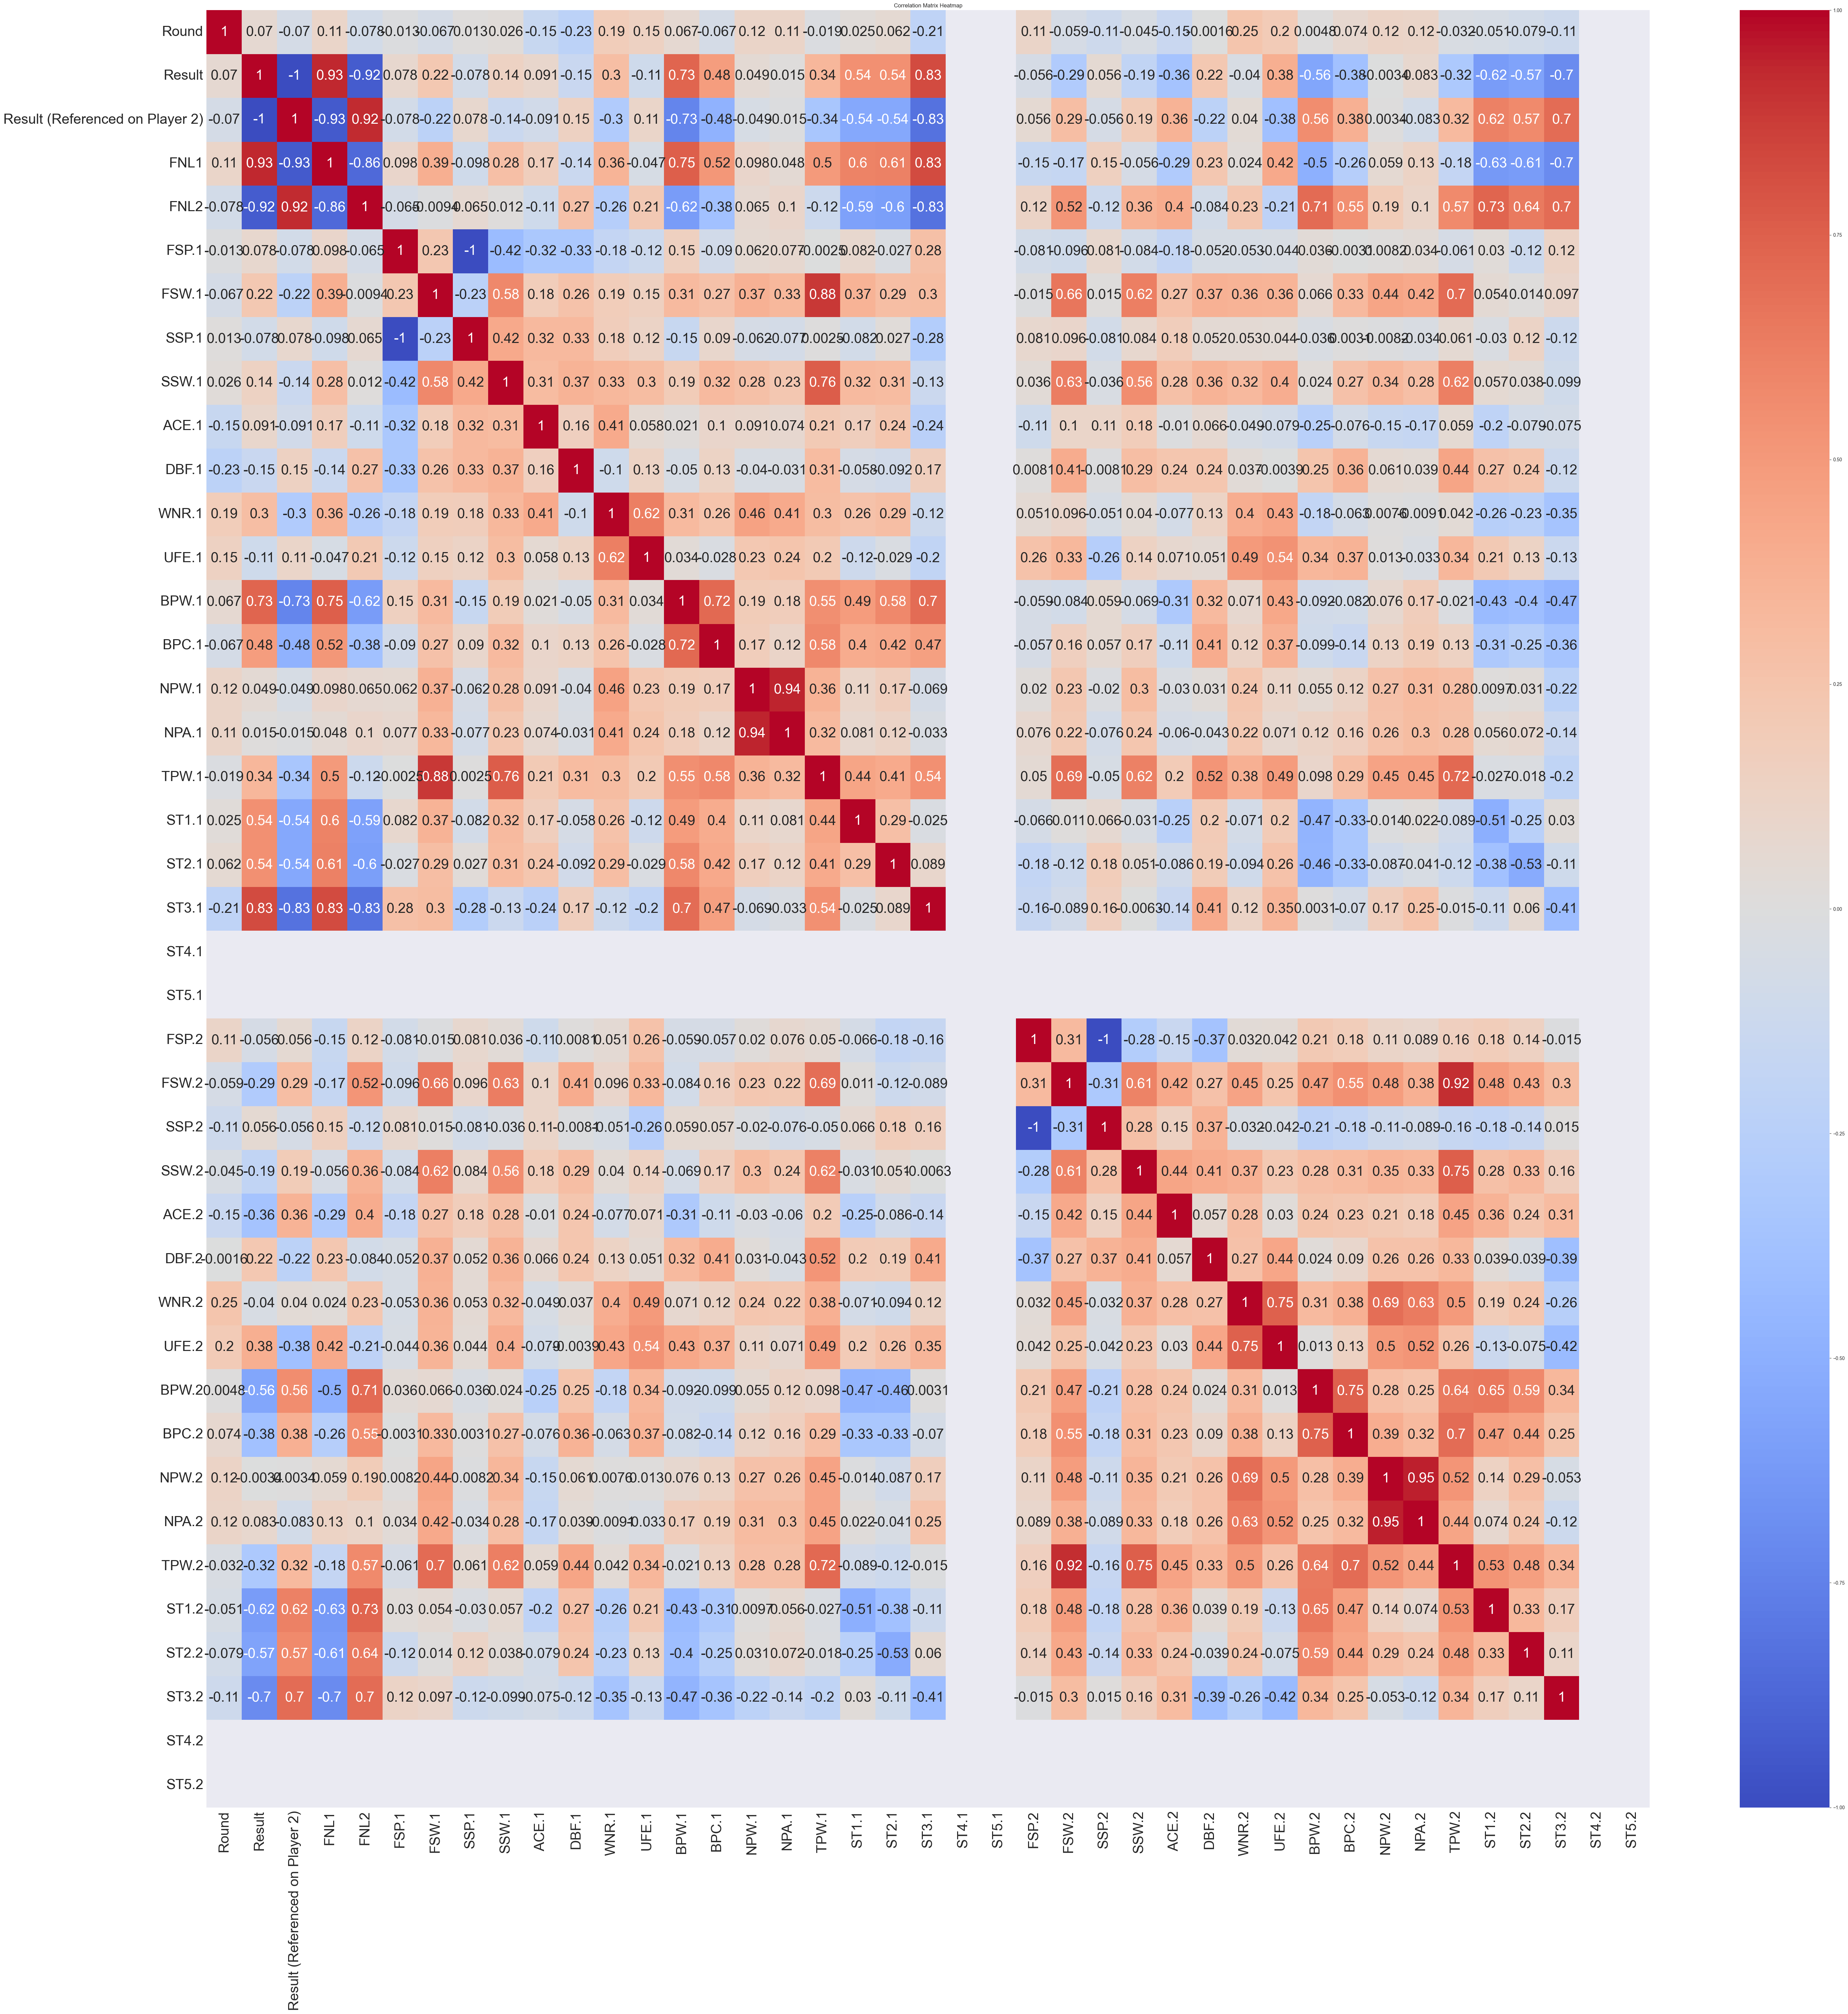

In [5]:
corr_matrix = ao_w_13.corr()

plt.figure(figsize=(60, 60))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={"fontsize":30})

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=0, fontsize=30)
plt.tight_layout()
plt.show()

In [6]:
df=ao_w_13[ao_w_13['Round']==1][['Player1', 'Player2', 'Result', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPW.1', 'NPW.1', 'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPW.2', 'NPW.2']]
df

Player1                     Player2  Result  ACE.1  DBF.1  \
0      Serena Williams              Ashleigh Barty       1    6.0    2.0   
1         Vesna Dolonc           Lara Arruabarrena       1    7.0    4.0   
2   Pauline Parmentier           Karolina Pliskova       0    3.0    6.0   
3       Heather Watson          Daniela Hantuchova       0    8.0    3.0   
4      Samantha Stosur            Klara Zakopalova       1    6.0    1.0   
..                 ...                         ...     ...    ...    ...   
59     Elina Svitolina         Svetlana Kuznetsova       1    5.0    5.0   
60   Bojana Jovanovski               Jana Cepelova       1    0.0    1.0   
61  Chanelle Scheepers           Yvonne Meusburger       0    2.0   13.0   
62        Su-Wei Hsieh  Barbora Zahlavova Strycova       0    1.0    5.0   
63     Johanna Larsson           Victoria Azarenka       0    2.0    5.0   

    WNR.1  UFE.1  BPW.1  NPW.1  ACE.2  DBF.2  WNR.2  UFE.2  BPW.2  NPW.2  
0      31     17    5.0   10.0    1.0    4.0      5     18    0.0    2.0  
1       7      4    5.0    NaN    0.0    3.0      0      3    4.0    NaN  
2       3      6    0.0    NaN    5.0    0.0      5      0    5.0    NaN  
3      27     45    4.0   10.0    6.0    2.0     37     44    5.0    5.0  
4      19     18    7.0    7.0    1.0    5.0     27     27    4.0   10.0  
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
59     27     21    5.0   12.0    1.0    4.0     17     24    2.0    4.0  
60      0      1    9.0    NaN    2.0    5.0      2      5    5.0    NaN  
61      2     13    4.0    NaN    1.0    5.0      1      5    5.0    NaN  
62     14     39    1.0   11.0    5.0    2.0     31     36    5.0   22.0  
63     13     29    3.0    4.0    0.0    7.0     27     32    5.0   15.0  

[64 rows x 15 columns]

In [7]:
unique_vals=pd.concat([df['Player1'], df['Player2']]).unique()
df1=pd.DataFrame(columns=['Player', 'Number of aces', 'Number of double faults', 'Number of winners', 'Number of unforced errors', 'Number of break points won', 'Number of net points won', 'Result', 'Performance index'])

for i in range(len(unique_vals)):
    for index, row in df.iterrows():
        if unique_vals[i]==row['Player1']:
            if row['Result']==1:
                s=pd.Series([row['Player1'], row['ACE.1'], row['DBF.1'], row['WNR.1'], row['UFE.1'], row['BPW.1'], row['NPW.1'], 'Won', 0.2255*row['ACE.1'] - 0.185*row['DBF.1'] + 0.17*row['WNR.1'] - 0.245*row['UFE.1'] + 0.645*row['BPW.1'] + 0.0262*row['NPW.1']], index=['Player', 'Number of aces', 'Number of double faults', 'Number of winners', 'Number of unforced errors', 'Number of break points won', 'Number of net points won', 'Result', 'Performance index'])
                df1=pd.concat([df1, s.to_frame().T], ignore_index=True)
            elif row['Result']==0:
                s=pd.Series([row['Player1'], row['ACE.1'], row['DBF.1'], row['WNR.1'], row['UFE.1'], row['BPW.1'], row['NPW.1'], 'Lost', 0.2255*row['ACE.1'] - 0.185*row['DBF.1'] + 0.17*row['WNR.1'] - 0.245*row['UFE.1'] + 0.645*row['BPW.1'] + 0.0262*row['NPW.1']], index=['Player', 'Number of aces', 'Number of double faults', 'Number of winners', 'Number of unforced errors', 'Number of break points won', 'Number of net points won', 'Result', 'Performance index'])
                df1=pd.concat([df1, s.to_frame().T], ignore_index=True)
        elif unique_vals[i]==row['Player2']:
            if row['Result']==1:
                s=pd.Series([row['Player2'],row['ACE.2'], row['DBF.2'], row['WNR.2'], row['UFE.2'], row['BPW.2'], row['NPW.2'], 'Lost', 0.2255*row['ACE.2'] - 0.185*row['DBF.2'] + 0.17*row['WNR.2'] - 0.245*row['UFE.2'] + 0.645*row['BPW.2'] + 0.0262*row['NPW.2']], index=['Player', 'Number of aces', 'Number of double faults', 'Number of winners', 'Number of unforced errors', 'Number of break points won', 'Number of net points won', 'Result', 'Performance index'])
                df1 = pd.concat([df1, s.to_frame().T], ignore_index=True)
            elif row['Result']==0:
                s=pd.Series([row['Player2'],row['ACE.2'], row['DBF.2'], row['WNR.2'], row['UFE.2'], row['BPW.2'], row['NPW.2'], 'Won', 0.2255*row['ACE.2'] - 0.185*row['DBF.2'] + 0.17*row['WNR.2'] - 0.245*row['UFE.2'] + 0.645*row['BPW.2'] + 0.0262*row['NPW.2']], index=['Player', 'Number of aces', 'Number of double faults', 'Number of winners', 'Number of unforced errors', 'Number of break points won', 'Number of net points won', 'Result', 'Performance index'])
                df1 = pd.concat([df1, s.to_frame().T], ignore_index=True)


In [8]:
df1=df1.dropna()
df1=df1.reset_index()
df1=df1.drop('index', axis=1)
df1

Player Number of aces Number of double faults  \
0              Serena Williams            6.0                     2.0   
1               Heather Watson            8.0                     3.0   
2              Samantha Stosur            6.0                     1.0   
3           Tsvetana Pironkova            5.0                     0.0   
4                  Annika Beck            0.0                     0.0   
..                         ...            ...                     ...   
77          Yaroslava Shvedova            3.0                    13.0   
78        Mariana Duque-Marino            4.0                     4.0   
79         Svetlana Kuznetsova            1.0                     4.0   
80  Barbora Zahlavova Strycova            5.0                     2.0   
81           Victoria Azarenka            0.0                     7.0   

   Number of winners Number of unforced errors Number of break points won  \
0                 31                        17                        5.0   
1                 27                        45                        4.0   
2                 19                        18                        7.0   
3                 30                        21                        3.0   
4                  8                        10                        6.0   
..               ...                       ...                        ...   
77                14                        43                        4.0   
78                10                        32                        3.0   
79                17                        24                        2.0   
80                31                        36                        5.0   
81                27                        32                        5.0   

   Number of net points won Result Performance index  
0                      10.0    Won             5.575  
1                      10.0   Lost            -2.344  
2                       7.0    Won            4.6864  
3                       4.0    Won            3.1223  
4                       3.0    Won            2.8586  
..                      ...    ...               ...  
77                      3.0   Lost           -7.2249  
78                      2.0   Lost           -3.9906  
79                      4.0   Lost           -2.1097  
80                     22.0    Won            1.0089  
81                     15.0    Won            -0.927  

[82 rows x 9 columns]

In [10]:
df_1=df1.sort_values(by='Performance index', ascending=False).head(10)
df_1

Player Number of aces Number of double faults  \
49      Kirsten Flipkens            7.0                     2.0   
34   Agnieszka Radwanska            9.0                     1.0   
0        Serena Williams            6.0                     2.0   
2        Samantha Stosur            6.0                     1.0   
16      Angelique Kerber            6.0                     5.0   
18       Flavia Pennetta            2.0                     3.0   
55      Monica Niculescu            1.0                     0.0   
66  Magdalena Rybarikova            4.0                     1.0   
11                 Na Li            3.0                     0.0   
38       Elina Svitolina            5.0                     5.0   

   Number of winners Number of unforced errors Number of break points won  \
49                14                         4                        5.0   
34                38                        31                        7.0   
0                 31                        17                        5.0   
2                 19                        18                        7.0   
16                30                        17                        4.0   
18                28                        21                        6.0   
55                10                        13                        7.0   
66                18                        16                        5.0   
11                20                        18                        5.0   
38                27                        21                        5.0   

   Number of net points won Result Performance index  
49                      2.0    Won            5.8859  
34                     22.0    Won            5.8009  
0                      10.0    Won             5.575  
2                       7.0    Won            4.6864  
16                      9.0    Won            4.1788  
18                      9.0    Won            3.6168  
55                     10.0    Won            3.5175  
66                      9.0    Won            3.3178  
11                     13.0    Won            3.2321  
38                     12.0    Won            3.1869

In [11]:
df2=ao_w_13[ao_w_13['Round']==2][['Player1', 'Player2', 'Result', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPW.1', 'NPW.1', 'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPW.2', 'NPW.2']]
unique_vals=pd.concat([df['Player1'], df['Player2']]).unique()

df3=pd.DataFrame(columns=['Player', 'Number of aces', 'Number of double faults', 'Number of winners', 'Number of unforced errors', 'Number of break points won', 'Number of net points won', 'Result', 'Performance index'])

for i in range(len(unique_vals)):
    for index, row in df2.iterrows():
        if unique_vals[i]==row['Player1']:
            if row['Result']==1:
                s=pd.Series([row['Player1'], row['ACE.1'], row['DBF.1'], row['WNR.1'], row['UFE.1'], row['BPW.1'], row['NPW.1'], 'Won', 0.2255*row['ACE.1'] - 0.185*row['DBF.1'] + 0.17*row['WNR.1'] - 0.245*row['UFE.1'] + 0.645*row['BPW.1'] + 0.0262*row['NPW.1']], index=['Player', 'Number of aces', 'Number of double faults', 'Number of winners', 'Number of unforced errors', 'Number of break points won', 'Number of net points won', 'Result', 'Performance index'])
                df3=pd.concat([df3, s.to_frame().T], ignore_index=True)
            elif row['Result']==0:
                s=pd.Series([row['Player1'], row['ACE.1'], row['DBF.1'], row['WNR.1'], row['UFE.1'], row['BPW.1'], row['NPW.1'], 'Lost', 0.2255*row['ACE.1'] - 0.185*row['DBF.1'] + 0.17*row['WNR.1'] - 0.245*row['UFE.1'] + 0.645*row['BPW.1'] + 0.0262*row['NPW.1']], index=['Player', 'Number of aces', 'Number of double faults', 'Number of winners', 'Number of unforced errors', 'Number of break points won', 'Number of net points won', 'Result', 'Performance index'])
                df3=pd.concat([df3, s.to_frame().T], ignore_index=True)
        elif unique_vals[i]==row['Player2']:
            if row['Result']==1:
                s=pd.Series([row['Player2'],row['ACE.2'], row['DBF.2'], row['WNR.2'], row['UFE.2'], row['BPW.2'], row['NPW.2'], 'Lost', 0.2255*row['ACE.2'] - 0.185*row['DBF.2'] + 0.17*row['WNR.2'] - 0.245*row['UFE.2'] + 0.645*row['BPW.2'] + 0.0262*row['NPW.2']], index=['Player', 'Number of aces', 'Number of double faults', 'Number of winners', 'Number of unforced errors', 'Number of break points won', 'Number of net points won', 'Result', 'Performance index'])
                df3 = pd.concat([df3, s.to_frame().T], ignore_index=True)
            elif row['Result']==0:
                s=pd.Series([row['Player2'],row['ACE.2'], row['DBF.2'], row['WNR.2'], row['UFE.2'], row['BPW.2'], row['NPW.2'], 'Won', 0.2255*row['ACE.2'] - 0.185*row['DBF.2'] + 0.17*row['WNR.2'] - 0.245*row['UFE.2'] + 0.645*row['BPW.2'] + 0.0262*row['NPW.2']], index=['Player', 'Number of aces', 'Number of double faults', 'Number of winners', 'Number of unforced errors', 'Number of break points won', 'Number of net points won', 'Result', 'Performance index'])
                df3 = pd.concat([df3, s.to_frame().T], ignore_index=True)


In [12]:
df3=df3.dropna()
df3=df3.reset_index()
df3=df3.drop('index', axis=1)
df3

Player Number of aces Number of double faults  \
0              Serena Williams           10.0                     2.0   
1                 Vesna Dolonc            2.0                     8.0   
2              Samantha Stosur            4.0                     3.0   
3           Tsvetana Pironkova            1.0                     2.0   
4                  Annika Beck            0.0                     3.0   
5              Casey Dellacqua            1.0                     0.0   
6             Eugenie Bouchard            4.0                     2.0   
7                Julia Goerges            6.0                     1.0   
8                        Na Li            4.0                     2.0   
9               Belinda Bencic            2.0                     5.0   
10          Ekaterina Makarova            4.0                     6.0   
11            Angelique Kerber            3.0                     1.0   
12                Alison Riske            4.0                     2.0   
13             Flavia Pennetta            9.0                     0.0   
14                 Monica Puig            5.0                     6.0   
15             Luksika Kumkhum            4.0                     8.0   
16             Jelena Jankovic            9.0                     4.0   
17                 Kurumi Nara            0.0                     2.0   
18                Zarina Diyas            1.0                     1.0   
19        Carla Suarez Navarro            0.0                     5.0   
20           Galina Voskoboeva            3.0                    13.0   
21                Alize Cornet            1.0                     9.0   
22               Camila Giorgi            0.0                    12.0   
23         Agnieszka Radwanska            1.0                     1.0   
24             Olga Govortsova            0.0                     1.0   
25            Christina McHale            3.0                     3.0   
26             Sloane Stephens            3.0                     3.0   
27             Olivia Rogowska            5.0                     2.0   
28             Elina Svitolina            7.0                     3.0   
29           Karolina Pliskova           11.0                     6.0   
30          Daniela Hantuchova            9.0                     8.0   
31                Ana Ivanovic            2.0                     2.0   
32                   Jie Zheng            0.0                     4.0   
33                Madison Keys            3.0                     1.0   
34            Kirsten Flipkens            0.0                     7.0   
35            Virginie Razzano            2.0                     1.0   
36                Lauren Davis            0.0                     6.0   
37               Irina Falconi            0.0                     2.0   
38            Monica Niculescu            0.0                     6.0   
39              Sabine Lisicki           10.0                     6.0   
40           Alla Kudryavtseva            4.0                     2.0   
41            Yanina Wickmayer            3.0                     3.0   
42                Mona Barthel            3.0                     6.0   
43                Ayumi Morita            1.0                     3.0   
44        Magdalena Rybarikova            4.0                     1.0   
45             Marina Erakovic            2.0                     5.0   
46           Varvara Lepchenko            1.0                     4.0   
47                Simona Halep            0.0                     3.0   
48            Stefanie Voegele            3.0                     1.0   
49          Dominika Cibulkova            0.0                     2.0   
50                 Karin Knapp            3.0                     9.0   
51             Maria Sharapova            2.0                    12.0   
52            Garbine Muguruza            6.0                     6.0   
53            Anna Schmiedlova            1.0                     5.0   
54       

In [13]:
df_3=df3.sort_values(by='Performance index', ascending=False).head(10)
df_3

Player Number of aces Number of double faults  \
16      Jelena Jankovic            9.0                     4.0   
11     Angelique Kerber            3.0                     1.0   
12         Alison Riske            4.0                     2.0   
18         Zarina Diyas            1.0                     1.0   
2       Samantha Stosur            4.0                     3.0   
0       Serena Williams           10.0                     2.0   
13      Flavia Pennetta            9.0                     0.0   
23  Agnieszka Radwanska            1.0                     1.0   
49   Dominika Cibulkova            0.0                     2.0   
5       Casey Dellacqua            1.0                     0.0   

   Number of winners Number of unforced errors Number of break points won  \
16                25                        14                        6.0   
11                22                        10                        4.0   
12                15                         8                        5.0   
18                27                        15                        5.0   
2                 23                        15                        5.0   
0                 24                        19                        4.0   
13                21                        14                        2.0   
23                18                        13                        5.0   
49                17                        13                        6.0   
5                 15                        15                        6.0   

   Number of net points won Result Performance index  
16                      0.0    Won            5.9795  
11                      3.0    Won            4.4401  
12                      2.0    Won            4.3994  
18                      2.0    Won            4.2329  
2                      13.0    Won            4.1476  
0                       3.0    Won            3.9686  
13                      4.0    Won            3.5643  
23                     11.0    Won            3.4287  
49                      4.0    Won            3.3098  
5                       7.0    Won            3.1539

In [14]:
common=np.intersect1d(df_1['Player'], df_3['Player'])
common

array(['Agnieszka Radwanska', 'Angelique Kerber', 'Flavia Pennetta',
       'Samantha Stosur', 'Serena Williams'], dtype=object)

Players in quarterfinals, semifinals and final

In [15]:
ao_w_13.tail(7)

Player1              Player2  Round  Result  \
120         Ana Ivanovic     Eugenie Bouchard      5       0   
121                Na Li      Flavia Pennetta      5       1   
122         Simona Halep   Dominika Cibulkova      5       0   
123  Agnieszka Radwanska    Victoria Azarenka      5       1   
124     Eugenie Bouchard                Na Li      6       0   
125   Dominika Cibulkova  Agnieszka Radwanska      6       1   
126                Na Li   Dominika Cibulkova      7       1   

     Result (Referenced on Player 2)  FNL1  FNL2  FSP.1  FSW.1  SSP.1  ...  \
120                                1   1.0   2.0     56     34     44  ...   
121                                0   2.0   0.0     64     23     36  ...   
122                                1   0.0   2.0     67     13     33  ...   
123                                0   2.0   1.0     59     33     41  ...   
124                                1   0.0   2.0     45     13     55  ...   
125                                0   2.0   0.0     64     22     36  ...   
126                                0   2.0   0.0     60     21     40  ...   

     BPW.2  BPC.2  NPW.2  NPA.2  TPW.2  ST1.2  ST2.2  ST3.2  ST4.2  ST5.2  
120    7.0   13.0   19.0   24.0    113    5.0    7.0    6.0    NaN    NaN  
121    1.0    4.0    2.0    2.0     37    2.0    2.0    NaN    NaN    NaN  
122    5.0    9.0    3.0    4.0     54    6.0    6.0    NaN    NaN    NaN  
123    2.0    5.0   20.0   34.0     74    1.0    7.0    0.0    NaN    NaN  
124    6.0   10.0   11.0   14.0     71    6.0    6.0    NaN    NaN    NaN  
125    1.0    9.0    4.0    9.0     40    1.0    2.0    NaN    NaN    NaN  
126    2.0    3.0    3.0    4.0     58    6.0    0.0    NaN    NaN    NaN  

[7 rows x 43 columns]

In [16]:
u=ao_w_13.tail(7)
unique=pd.concat([ao_w_13.tail(7)['Player1'], ao_w_13.tail(7)['Player2']]).unique()
unique

array(['Ana Ivanovic', 'Na Li', 'Simona Halep', 'Agnieszka Radwanska',
       'Eugenie Bouchard', 'Dominika Cibulkova', 'Flavia Pennetta',
       'Victoria Azarenka'], dtype=object)

In [17]:
commo=np.intersect1d(common, unique)
commo

array(['Agnieszka Radwanska', 'Flavia Pennetta'], dtype=object)